# k-means clustering

In [133]:
%pdb

Automatic pdb calling has been turned OFF


In [134]:
import numpy as np
import sklearn

from matplotlib import pyplot as plt
from sklearn import datasets

In [135]:
plt.style.use('ggplot')
plt.ion()

## Loading and inspecting data

In [136]:
# load the data set
iris = datasets.load_iris()

print(iris.data.shape)
print("Features: %s" % iris.feature_names)

print(iris.target.shape)
print("Labels  : %s" % iris.target_names)

(150, 4)
Features: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
(150,)
Labels  : ['setosa' 'versicolor' 'virginica']


In [137]:
X = iris.data
y = iris.target

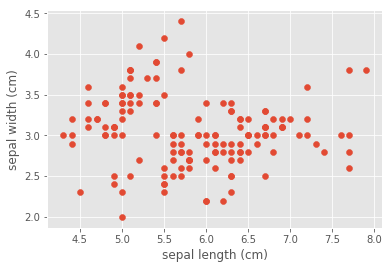

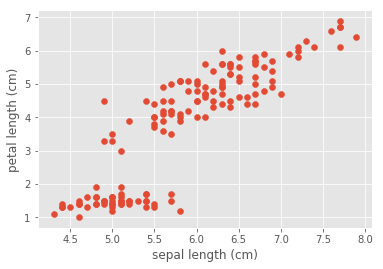

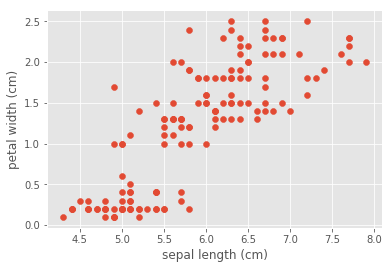

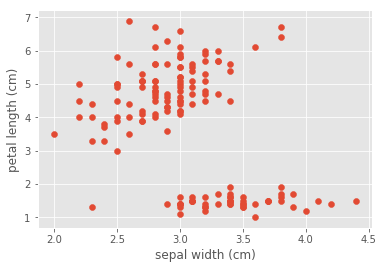

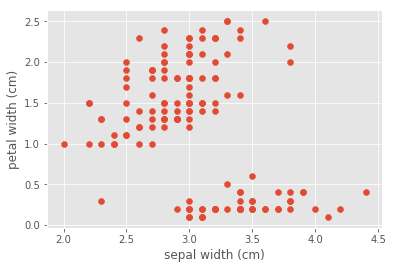

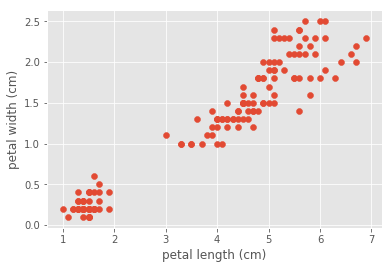

In [160]:
# plot combinations of two features 
# to get a feel for how many clusters the data might fall into
for i in range(X.shape[1]):
    for j in range(i+1, X.shape[1]):
        fig = plt.figure()
        plt.scatter(X[:, i], X[:, j])
        plt.xlabel(iris.feature_names[i])
        plt.ylabel(iris.feature_names[j])

## Training

In [138]:
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split

In [140]:
# split the data into a training set and a test set
X_train, X_test = train_test_split(X, test_size=0.1, random_state=51)

In [143]:
# train a k-means model with 2 clusters
kmeans = KMeans(n_clusters=2)
kmeans.fit(X_train)

print(kmeans.cluster_centers_)

[[4.97659574 3.35106383 1.57234043 0.29574468]
 [6.29090909 2.89545455 4.97613636 1.70227273]]


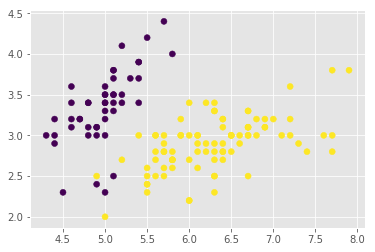

In [144]:
# plot the training set
plt.scatter(X_train[:,0], X_train[:,1], c=kmeans.labels_, cmap='viridis')

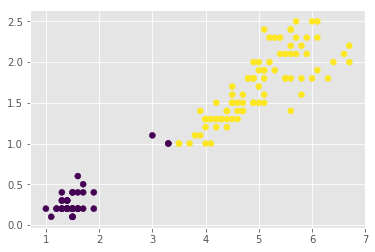

In [145]:
# and the other two dimensions
plt.scatter(X_train[:,2], X_train[:,3], c=kmeans.labels_, cmap='viridis')

### Task: train a k-means model with a different number of clusters and plot the resulting clustering

## Evaluating a clustering

Which clustering is better?

### Task: predict cluster membership for the test set and plot the data points as well as centroids

### Intrinsic cluster evaluation
e.g., silhouette coefficient

In [163]:
# silhouette coefficient: how well separated are different clusters and how compact is each cluster
from sklearn import metrics

y_test = kmeans.predict(X_test)
silhouette_score = metrics.silhouette_score(X_test, y_test, metric="euclidean")
print(silhouette_score)

0.4618701134990898


"The Silhouette Coefficient is calculated using the mean intra-cluster distance (a) and the mean nearest-cluster distance (b) for each sample. The Silhouette Coefficient for a sample is (b - a) / max(a, b). To clarify, b is the distance between a sample and the nearest cluster that the sample is not a part of. Note that Silhouette Coefficient is only defined if number of labels is 2 <= n_labels <= n_samples - 1.

[...]

The best value is 1 and the worst value is -1. Values near 0 indicate overlapping clusters. Negative values generally indicate that a sample has been assigned to the wrong cluster, as a different cluster is more similar."

from http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html

See also http://scikit-learn.org/stable/modules/clustering.html#clustering-evaluation for further information on cluster evaluation, e.g., purity, rand index, mutual information.

### Extrinsic cluster evaluation (i.e. if given true labels)
e.g., homogeneity and completeness

"A clustering result satisfies homogeneity if all of its clusters contain only data points which are members of a single class.

A clustering result satisfies completeness if all the data points that are members of a given class are elements of the same cluster.

Both scores have positive values between 0.0 and 1.0, larger values being desirable."

The V-Measure is the harmonic mean of the homogeneity and completeness.

from http://scikit-learn.org/stable/modules/generated/sklearn.metrics.homogeneity_completeness_v_measure.html  

In [223]:
# with gold standard aka true labels
from sklearn import metrics

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=51)

homogeneities = []
completenesses = []
v_measures = []

for i in range(2, 20):

    kmeans = KMeans(n_clusters=i)
    kmeans.fit(X_train)
    y_pred = kmeans.predict(X_test)

    homogeneity, completeness, v_measure = metrics.homogeneity_completeness_v_measure(y_test, y_pred)

    homogeneities.append(homogeneity)
    completenesses.append(completeness)
    v_measures.append(v_measure)
    
    print("%.4f %.4f %.4f" % (homogeneity, completeness, v_measure))


0.4956 1.0000 0.6628
0.6338 0.6338 0.6338
0.7478 0.5766 0.6511
0.7478 0.5052 0.6030
0.7478 0.5052 0.6030
1.0000 0.5773 0.7320
1.0000 0.5773 0.7320
1.0000 0.5773 0.7320
1.0000 0.5128 0.6780
1.0000 0.5483 0.7083
1.0000 0.5483 0.7083
1.0000 0.5221 0.6860
1.0000 0.5221 0.6860
1.0000 0.5221 0.6860
1.0000 0.4898 0.6576
0.8739 0.4510 0.5949
1.0000 0.5317 0.6942
1.0000 0.5221 0.6860


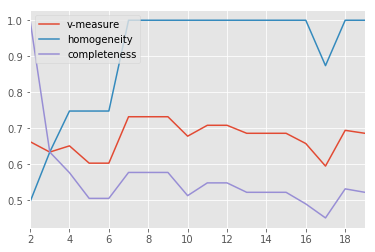

In [224]:
# plot how the evalution measures change with the number of clusters 
plt.plot(range(2, 20), v_measures, label="v-measure")
plt.plot(range(2, 20), homogeneities, label="homogeneity")
plt.plot(range(2, 20), completenesses, label="completeness")
ax = plt.gca()
ax.set_xlim(2, 19)
plt.legend()

### Task: Plot the best predicted clustering next to the original labels of the data.

## Demonstration of k-means assumptions
from http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_assumptions.html

Automatically created module for IPython interactive environment


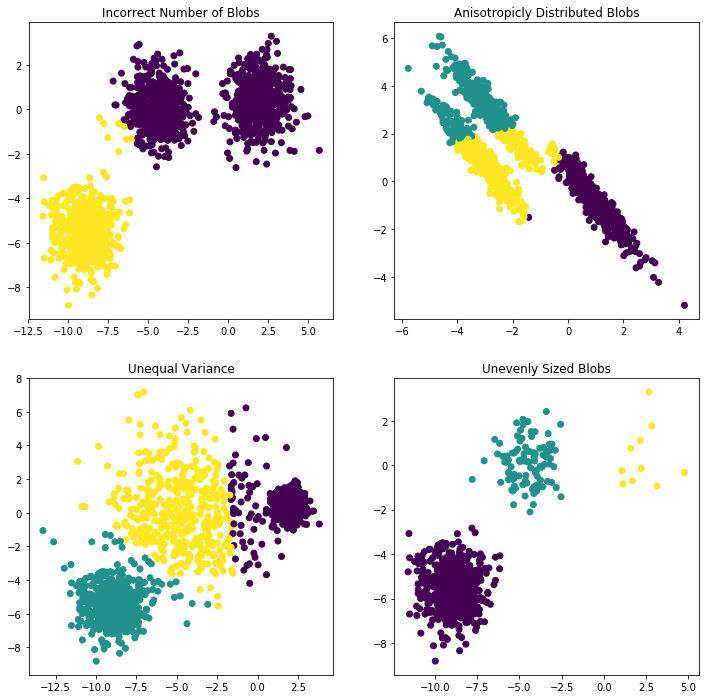

In [3]:
print(__doc__)

# Author: Phil Roth <mr.phil.roth@gmail.com>
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

plt.figure(figsize=(12, 12))

n_samples = 1500
random_state = 170
X, y = make_blobs(n_samples=n_samples, random_state=random_state)

# Incorrect number of clusters
y_pred = KMeans(n_clusters=2, random_state=random_state).fit_predict(X)

plt.subplot(221)
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.title("Incorrect Number of Blobs")

# Anisotropicly distributed data
transformation = [[0.60834549, -0.63667341], [-0.40887718, 0.85253229]]
X_aniso = np.dot(X, transformation)
y_pred = KMeans(n_clusters=3, random_state=random_state).fit_predict(X_aniso)

plt.subplot(222)
plt.scatter(X_aniso[:, 0], X_aniso[:, 1], c=y_pred)
plt.title("Anisotropicly Distributed Blobs")

# Different variance
X_varied, y_varied = make_blobs(n_samples=n_samples,
                                cluster_std=[1.0, 2.5, 0.5],
                                random_state=random_state)
y_pred = KMeans(n_clusters=3, random_state=random_state).fit_predict(X_varied)

plt.subplot(223)
plt.scatter(X_varied[:, 0], X_varied[:, 1], c=y_pred)
plt.title("Unequal Variance")

# Unevenly sized blobs
X_filtered = np.vstack((X[y == 0][:500], X[y == 1][:100], X[y == 2][:10]))
y_pred = KMeans(n_clusters=3,
                random_state=random_state).fit_predict(X_filtered)

plt.subplot(224)
plt.scatter(X_filtered[:, 0], X_filtered[:, 1], c=y_pred)
plt.title("Unevenly Sized Blobs")

plt.show()

## Other interesting tutorials on k-means that I stumbled upon

https://jakevdp.github.io/PythonDataScienceHandbook/05.11-k-means.html  
https://www.datascience.com/blog/k-means-clustering  

## More tutorials on clustering from scikit-learn:

http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_assumptions.html  
http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_digits.html  
http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html  
http://scikit-learn.org/stable/auto_examples/cluster/plot_mini_batch_kmeans.html  
http://scikit-learn.org/stable/modules/clustering.html  
http://scikit-learn.org/stable/auto_examples/cluster/plot_cluster_comparison.html  
